# Set environment

In [35]:
source("config_path.R")

# Import Data

In [36]:
attach(file.path(OUTDIR, "HTS-GroupAll-DESeq.RData"))

The following objects are masked from file:/shared_space/TA_clint/analysis_output/out/HTS-GroupAll-DESeq.RData (pos = 6):

    columnData, countData, dds, gene_exp, res_media_h99, res_media_mar,
    res_strain_tc, res_strain_ypd, rlgexp, vomexp, vstexp



In [37]:
attach(file.path(OUTDIR, "HTS-GO-Info.RData"))

The following objects are masked from file:/shared_space/TA_clint/analysis_output/out/HTS-GO-Info.RData (pos = 5):

    dat_go_bp_annot, dat_go_cc_annot, dat_go_cne_h99, dat_go_fc_annot,
    dat_go_info_bp, dat_go_info_cc, dat_go_info_fc, gset_go_bp,
    gset_go_cc, gset_go_fc

The following objects are masked from file:/shared_space/TA_clint/analysis_output/out/HTS-GO-Info.RData (pos = 6):

    dat_go_bp_annot, dat_go_cc_annot, dat_go_cne_h99, dat_go_fc_annot,
    dat_go_info_bp, dat_go_info_cc, dat_go_info_fc



In [38]:
gage_wrapper <- function(rld, gset, crt, trt){
    gage::gage(
        assay(rld),
        gsets = gset,
        use.fold = FALSE,
                      
        ### reference condition or phenotype 
        ### (i.e. the control group) 
        ref  = which(colData(rld)[["Group"]] == crt), 
    
        ### a numeric vector of column numbers for 
        ### the target condition or phenotype 
        ### (i.e.the experiment group)
        samp = which(colData(rld)[["Group"]] == trt),
        compare = "unpaired",
                        
        ### he effective gene set size, 
        ### i.e. the number of genes included in the gene set test
        set.size = c(10, 500),
                      
        ### provide two sided test "greater" & "less"
        same.dir = TRUE)
} # end func

# 01 YPD -> TC in H99

In [39]:
gageres_media_h99 <- list()
gageres_media_h99$bp <- gage_wrapper(rlgexp, gset_go_bp, "YPDH99", "TCH99")
gageres_media_h99$fc <- gage_wrapper(rlgexp, gset_go_fc, "YPDH99", "TCH99")
gageres_media_h99$cc <- gage_wrapper(rlgexp, gset_go_cc, "YPDH99", "TCH99")

# 02 YPD -> TC in mar1d

In [40]:
gageres_media_mar <- list()
gageres_media_mar$bp <- gage_wrapper(rlgexp, gset_go_bp, "YPDmar1d", "TCmar1d")
gageres_media_mar$fc <- gage_wrapper(rlgexp, gset_go_fc, "YPDmar1d", "TCmar1d")
gageres_media_mar$cc <- gage_wrapper(rlgexp, gset_go_cc, "YPDmar1d", "TCmar1d")

# 03 H99 vs mar1d in YPD

In [41]:
gageres_strain_ypd <- list()
gageres_strain_ypd$bp <- gage_wrapper(rlgexp, gset_go_bp, "YPDH99", "YPDmar1d")
gageres_strain_ypd$fc <- gage_wrapper(rlgexp, gset_go_fc, "YPDH99", "YPDmar1d")
gageres_strain_ypd$cc <- gage_wrapper(rlgexp, gset_go_cc, "YPDH99", "YPDmar1d")

# 04 H99 vs mar1d in TC

In [42]:
gageres_strain_tc <- list()
gageres_strain_tc$bp <- gage_wrapper(rlgexp, gset_go_bp, "TCH99", "TCmar1d")
gageres_strain_tc$fc <- gage_wrapper(rlgexp, gset_go_fc, "TCH99", "TCmar1d")
gageres_strain_tc$cc <- gage_wrapper(rlgexp, gset_go_cc, "TCH99", "TCmar1d")

In [44]:
#outfile <- file.path(OUTDIR, "HTS-GroupB-DESeq.RData")
outfile <- file.path(OUTDIR, "HTS-GroupAll-gage-go.RData")

save(gageres_media_h99,
     gageres_media_mar,
     gageres_strain_ypd,
     gageres_strain_tc,
     file = outfile)

tools::md5sum(outfile)

/shared_space/TA_clint/analysis_output/out/HTS-GroupAll-gage-go.RData 
                                   "a7303250f27620b6c74f54dc3fb47b95"

# Compare

In [ ]:
source()
attach()

In [142]:
great_media_h99  <- gageres_media_h99$bp[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05, q.val < 0.2)
great_media_mar  <- gageres_media_mar$bp[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05, q.val < 0.2)
great_strain_ypd <- gageres_strain_ypd$bp[["greater"]] %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05, q.val < 0.2)
great_strain_tc  <- gageres_strain_tc$bp[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05, q.val < 0.2)

In [143]:
great_media_h99 %>% nrow
great_media_mar %>% nrow
great_strain_ypd%>% nrow
great_strain_tc%>% nrow

[1] 4

[1] 6

[1] 5

[1] 9

In [144]:
less_media_h99  <- gageres_media_h99$bp[["less"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05, q.val < 0.2)
less_media_mar  <- gageres_media_mar$bp[["less"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05, q.val < 0.2)
less_strain_ypd <- gageres_strain_ypd$bp[["less"]] %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05, q.val < 0.2)
less_strain_tc  <- gageres_strain_tc$bp[["less"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05, q.val < 0.2)

In [128]:
less_media_h99 %>% nrow
less_media_mar %>% nrow
less_strain_ypd%>% nrow
less_strain_tc%>% nrow

[1] 8

[1] 7

[1] 1

[1] 1

In [85]:
great_media_h99

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0005975 | carbohydrate metabolic process,0.0001925656,3.635868,0.0001925656,0.007702623,73,0.0001925656
GO:0055085 | transmembrane transport,0.0011672477,3.062206,0.0011672477,0.023344954,217,0.0011672477


In [112]:
great_media_mar

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0005975 | carbohydrate metabolic process,8.289447e-07,4.998229,8.289447e-07,3.315779e-05,73,8.289447e-07
GO:0055085 | transmembrane transport,2.983937e-03,2.763286,2.983937e-03,5.967874e-02,217,2.983937e-03
GO:0008152 | metabolic process,7.000528e-03,2.468848,7.000528e-03,8.445875e-02,188,7.000528e-03
GO:0006629 | lipid metabolic process,1.028764e-02,2.438668,1.028764e-02,8.445875e-02,17,1.028764e-02
"GO:0006355 | regulation of transcription, DNA-templated",1.055734e-02,2.316060,1.055734e-02,8.445875e-02,185,1.055734e-02
GO:0007165 | signal transduction,1.284965e-02,2.344728,1.284965e-02,8.566434e-02,17,1.284965e-02


In [90]:
great_strain_ypd

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0006260 | DNA replication,9.995309e-06,4.774314,9.995309e-06,0.0003790192,25,9.995309e-06
GO:0006364 | rRNA processing,1.895096e-05,5.560152,1.895096e-05,0.0003790192,10,1.895096e-05
GO:0006412 | translation,1.782307e-04,3.671655,1.782307e-04,0.0023764095,106,1.782307e-04
"GO:0006351 | transcription, DNA-templated",9.484122e-04,3.227181,9.484122e-04,0.0094841220,39,9.484122e-04
GO:0006396 | RNA processing,6.216762e-03,2.613073,6.216762e-03,0.0497340955,22,6.216762e-03


In [54]:
great_strain_tc

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0006412 | translation,0.0001465249,3.715852,0.0001465249,0.005860995,106,0.0001465249
GO:0006260 | DNA replication,0.0004373302,3.565956,0.0004373302,0.008746605,25,0.0004373302


In [70]:
less_media_h99

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0006412 | translation,2.470414e-37,-15.881602,2.470414e-37,9.881654e-36,106,2.470414e-37
"GO:0006351 | transcription, DNA-templated",4.237494e-05,-4.155858,4.237494e-05,8.474989e-04,39,4.237494e-05
GO:0006364 | rRNA processing,1.441801e-04,-4.673456,1.441801e-04,1.922401e-03,10,1.441801e-04
GO:0006413 | translational initiation,5.598652e-04,-3.662656,5.598652e-04,5.084740e-03,14,5.598652e-04
GO:0044267 | cellular protein metabolic process,6.355925e-04,-3.934082,6.355925e-04,5.084740e-03,10,6.355925e-04
GO:0015986 | ATP synthesis coupled proton transport,4.720332e-03,-2.921311,4.720332e-03,3.146888e-02,10,4.720332e-03
GO:0006396 | RNA processing,6.443605e-03,-2.603140,6.443605e-03,3.682060e-02,22,6.443605e-03


In [50]:
less_media_mar

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0006412 | translation,4.496196e-39,-17.202390,4.496196e-39,1.798478e-37,106,4.496196e-39
"GO:0006351 | transcription, DNA-templated",4.510585e-06,-4.794394,4.510585e-06,9.021169e-05,39,4.510585e-06
GO:0006364 | rRNA processing,2.998514e-05,-5.209959,2.998514e-05,3.998019e-04,10,2.998514e-05
GO:0006396 | RNA processing,8.519377e-04,-3.357292,8.519377e-04,8.519377e-03,22,8.519377e-04
GO:0006413 | translational initiation,2.070595e-03,-3.148294,2.070595e-03,1.656476e-02,14,2.070595e-03
GO:0015986 | ATP synthesis coupled proton transport,3.148104e-03,-3.242954,3.148104e-03,2.098736e-02,10,3.148104e-03
GO:0044267 | cellular protein metabolic process,6.867410e-03,-2.744037,6.867410e-03,3.924234e-02,10,6.867410e-03


In [55]:
less_strain_ypd

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0005975 | carbohydrate metabolic process,0.0005785902,-3.315923,0.0005785902,0.02314361,73,0.0005785902


In [56]:
less_strain_tc

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0006886 | intracellular protein transport,0.000858987,-3.208737,0.000858987,0.03435948,63,0.000858987


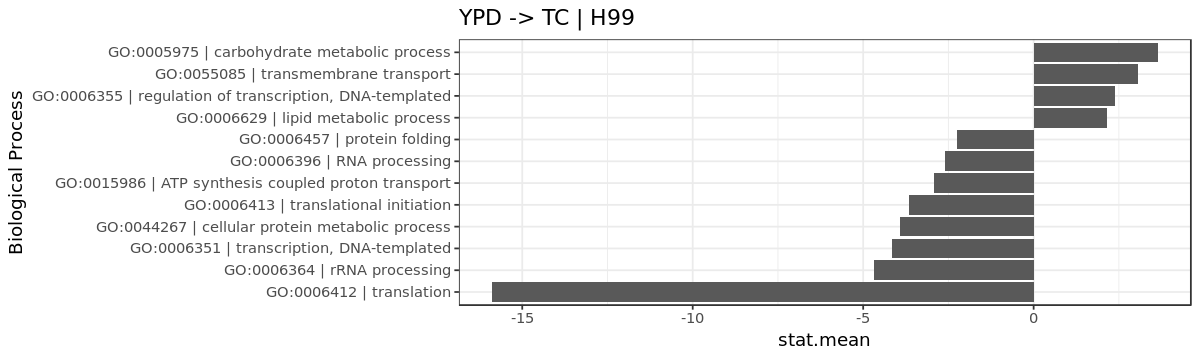

In [145]:
options(repr.plot.width = 10, repr.plot.height = 3)

tmp <- bind_rows(great_media_h99, less_media_h99) %>% arrange(stat.mean)
tmp$name <- factor(tmp$name, levels = tmp$name)

gp <- ggplot(tmp, aes(x = name, y = stat.mean)) + 
    geom_bar(stat="identity") + 
    coord_flip() + theme_bw() + 
    labs(y = "stat.mean", x = "Biological Process") +
    ggtitle("YPD -> TC | H99")
print(gp)

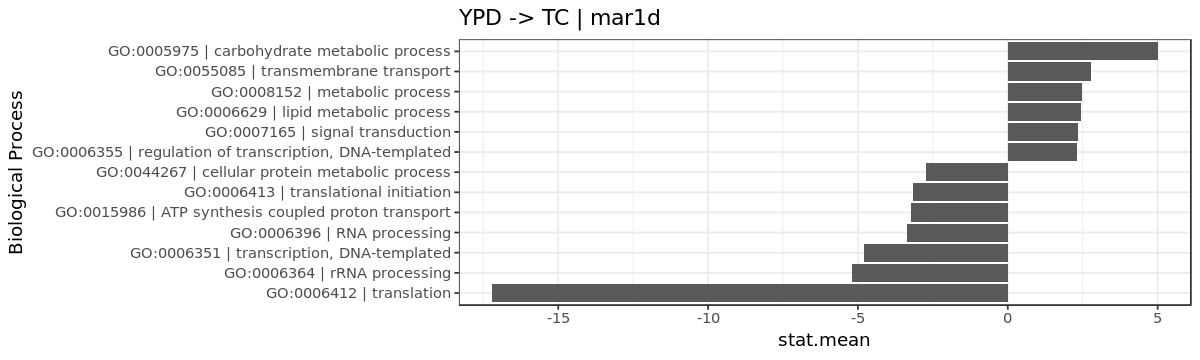

In [146]:
options(repr.plot.width = 10, repr.plot.height = 3)

tmp <- bind_rows(great_media_mar, less_media_mar) %>% arrange(stat.mean)
tmp$name <- factor(tmp$name, levels = tmp$name)

gp <- ggplot(tmp, aes(x = name, y = stat.mean)) + 
    geom_bar(stat="identity") + 
    coord_flip() + theme_bw() + 
    labs(y = "stat.mean", x = "Biological Process") +
    ggtitle("YPD -> TC | mar1d")
print(gp)

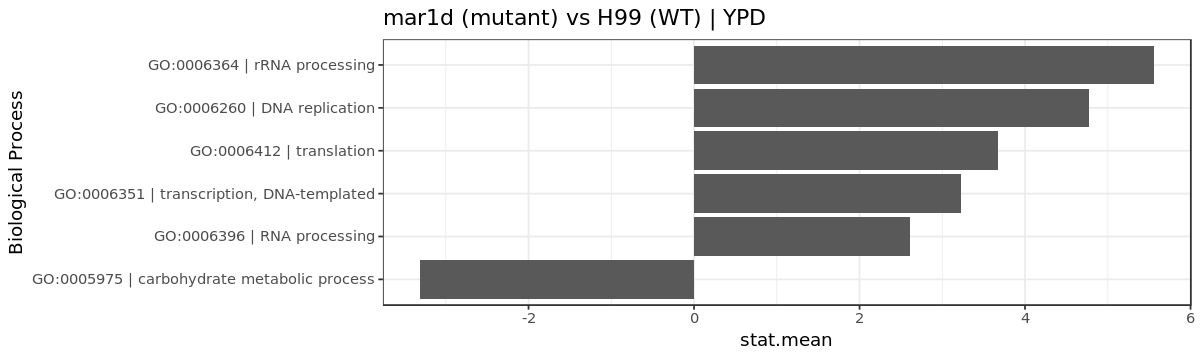

In [147]:
options(repr.plot.width = 10, repr.plot.height = 3)

tmp <- bind_rows(great_strain_ypd, less_strain_ypd) %>% arrange(stat.mean)
tmp$name <- factor(tmp$name, levels = tmp$name)

gp <- ggplot(tmp, aes(x = name, y = stat.mean)) + 
    geom_bar(stat="identity") + 
    coord_flip() + theme_bw() + 
    labs(y = "stat.mean", x = "Biological Process") +
    ggtitle("mar1d (mutant) vs H99 (WT) | YPD")
print(gp)

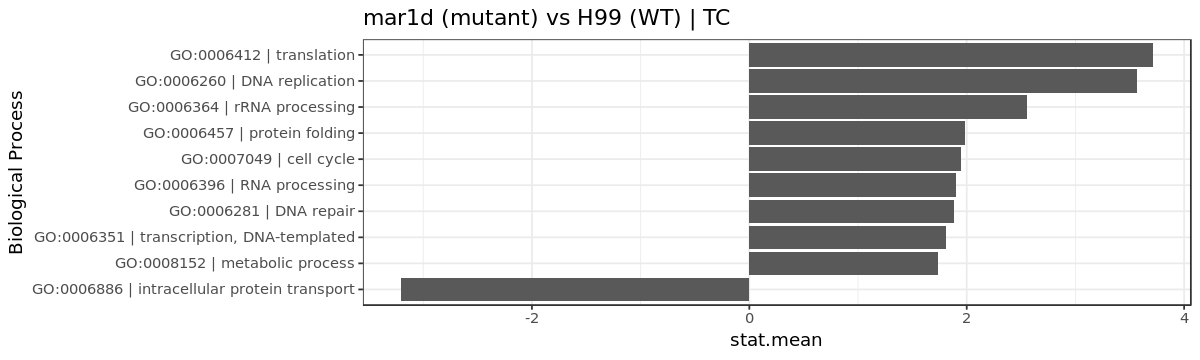

In [148]:
options(repr.plot.width = 10, repr.plot.height = 3)

tmp <- bind_rows(great_strain_tc, less_strain_tc) %>% arrange(stat.mean)
tmp$name <- factor(tmp$name, levels = tmp$name)

gp <- ggplot(tmp, aes(x = name, y = stat.mean)) + 
    geom_bar(stat="identity") + 
    coord_flip() + theme_bw() + 
    labs(y = "stat.mean", x = "Biological Process") +
    ggtitle("mar1d (mutant) vs H99 (WT) | TC")
print(gp)

In [22]:
tmp1 <- gageres_media_h99$bp[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)
tmp2 <- gageres_media_mar$bp[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)
tmp3 <- gageres_strain_ypd$bp[["greater"]] %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)
tmp4 <- gageres_strain_tc$bp[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)

In [28]:
tmp1

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0005975 | carbohydrate metabolic process,8.469824e-05,3.863148,8.469824e-05,0.003387929,73,8.469824e-05
GO:0055085 | transmembrane transport,3.194852e-04,3.439690,3.194852e-04,0.006389704,217,3.194852e-04
"GO:0006355 | regulation of transcription, DNA-templated",1.335641e-02,2.224637,1.335641e-02,0.141595633,185,1.335641e-02
GO:0006629 | lipid metabolic process,1.415956e-02,2.302403,1.415956e-02,0.141595633,17,1.415956e-02
GO:0007165 | signal transduction,2.531501e-02,2.038223,2.531501e-02,0.202520105,17,2.531501e-02


In [34]:
tmp4

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0005737 | cytoplasm,0.04580827,1.694553,0.04580827,0.4122744,108,0.04580827


In [24]:
print(setdiff(tmp2$name, tmp1$name) %>% sort)

[1] "GO:0008152 | metabolic process"


In [25]:
print(setdiff(tmp4$name, tmp3$name) %>% sort)

[1] "GO:0006281 | DNA repair"        "GO:0006457 | protein folding"  
[3] "GO:0007049 | cell cycle"        "GO:0008152 | metabolic process"


In [29]:
tmp1 <- gageres_media_h99$cc[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)
tmp2 <- gageres_media_mar$cc[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)
tmp3 <- gageres_strain_ypd$cc[["greater"]] %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)
tmp4 <- gageres_strain_tc$cc[["greater"]]  %>% as.data.frame %>% rownames_to_column("name") %>% filter(p.val < 0.05)

In [32]:
tmp1

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0016021 | integral component of membrane,4.015234e-06,4.498759,4.015234e-06,0.0000361371,343,4.015234e-06
GO:0016020 | membrane,1.578143e-02,2.160686,1.578143e-02,0.0710164504,142,1.578143e-02


In [33]:
tmp4

name,p.geomean,stat.mean,p.val,q.val,set.size,exp1
GO:0005737 | cytoplasm,0.04580827,1.694553,0.04580827,0.4122744,108,0.04580827


In [30]:
print(setdiff(tmp2$name, tmp1$name) %>% sort)

character(0)


In [31]:
print(setdiff(tmp4$name, tmp3$name) %>% sort)

character(0)
